<a href="https://colab.research.google.com/github/Zinwaiyan274/Twitter-Sentiment-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#essential libs
import pandas as pd
import numpy as np



# for model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from tqdm.notebook import tqdm as tn
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


train_data = pd.read_csv("/content/twitter_training.csv")
val_data = pd.read_csv("/content/twitter_validation.csv")

# Below data are the raw that we get, we gonna prepocessing and explore(EDA)

In [ ]:
# our data headline does not exist, so we gonna label by our own
headers=['ID','Entity','label','Feature']


train_data = pd.read_csv("/content/twitter_training.csv", sep=',', names=headers)

val_data = pd.read_csv("/content/twitter_validation.csv", sep=',', names=headers)

In [ ]:
# We could see that some columns are not totally useful for us, So I gonna drop them to clean

train_data= train_data.drop(train_data.columns[[0, 1]],axis = 1)
val_data= val_data.drop(val_data.columns[[0, 1]],axis = 1)


In [ ]:
train_data

,label,Feature
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [ ]:
val_data

,label,Feature
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


Data Exploration

In [ ]:
# for train data
label = train_data["label"].value_counts()
numbers = label.index
quantity = label.values

import plotly.express as px
figure = px.pie(all_df, 
             values=quantity, 
             names=numbers,hole = 0.5, )
figure.show()

In [ ]:
# for val data
label = val_data["label"].value_counts()
numbers = label.index
quantity = label.values

import plotly.express as px
figure = px.pie(all_df, 
             values=quantity, 
             names=numbers,hole = 0.5, )
figure.show()

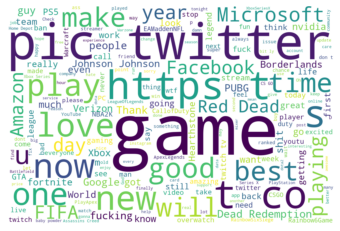

In [ ]:
# Word frequency  
#val data
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(' '.join(val_data["Feature"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


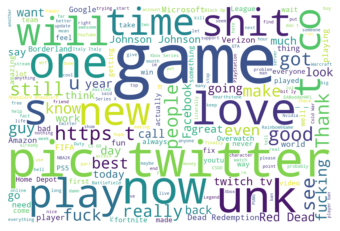

In [ ]:
# Word frequency  
#train data
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(' '.join(train_data["Feature"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
#append 

all_df = train_data.append(val_data)
# all_df["Feature"]
all_df

,label,Feature
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


#Cleaning

In [ ]:
# all_df.duplicated().sum()
all_df= all_df.drop_duplicates()
all_df

,label,Feature
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
988,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
989,Positive,Thank you to Matching funds Home Depot RW paym...
991,Neutral,Late night stream with the boys! Come watch so...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...


In [ ]:
all_df.isnull().sum()

label      0
Feature    4
dtype: int64

In [ ]:
all_df = all_df.dropna()
all_df

,label,Feature
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
988,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
989,Positive,Thank you to Matching funds Home Depot RW paym...
991,Neutral,Late night stream with the boys! Come watch so...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...


In [ ]:
# one hot encoding !!

types = ('Negative','Positive','Neutral','Irrelevant')
df = pd.DataFrame(types, columns=['label'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(df, columns=["label"], prefix=["Type_is"] )
# merge with main df bridge_df on key values
df = df.join(dum_df)
df

,label,Type_is_Irrelevant,Type_is_Negative,Type_is_Neutral,Type_is_Positive
0,Negative,0,1,0,0
1,Positive,0,0,0,1
2,Neutral,0,0,1,0
3,Irrelevant,1,0,0,0


In [ ]:
train_label =  train_data.label.value_counts()
train_label

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: label, dtype: int64

In [ ]:
val_label =  val_data.label.value_counts()
val_label

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: label, dtype: int64

In [ ]:
# Standardization and encoding 

""" 
Neutral', '0'
'Positive', '1'
'Negative', '-1'
'Irrelevant', '2'
"""

all_df["label"] = all_df["label"].str.replace('Neutral', '0') 
all_df["label"] = all_df["label"].str.replace('Positive', '1')
all_df["label"] = all_df["label"].str.replace('Negative', '-1')
all_df["label"] = all_df["label"].str.replace('Irrelevant', '2')



all_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,label,Feature
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
988,0,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
989,1,Thank you to Matching funds Home Depot RW paym...
991,0,Late night stream with the boys! Come watch so...
995,2,⭐️ Toronto is the arts and culture capital of ...


So, we could conclude, we have 4 labels 



1.   Neutral 
2.   Positive 
3.   Negative
4.   Irrelevant  

and encoded them into 

Neutral'= '0'

'Positive' = '1'

'Negative' ='-1'

'Irrelevant' = '2'






---

How about the null values? chek it out!


In [ ]:
train_data.isnull().sum()

label        0
Feature    686
dtype: int64

As we could see above, our main feacture in train data has missing null values. Let's fix them

In [ ]:
train_data= train_data.dropna()
train_data.isnull().sum()

label      0
Feature    0
dtype: int64

In [ ]:
val_data.isnull().sum()

label      0
Feature    0
dtype: int64

We have no missing null values in val_data. So, we could 


leave them just the way it is.


In [ ]:
all_df

,label,Feature
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
988,0,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
989,1,Thank you to Matching funds Home Depot RW paym...
991,0,Late night stream with the boys! Come watch so...
995,2,⭐️ Toronto is the arts and culture capital of ...


# Raw Data Cleaning

What we've changed the raw data above?


1.  Labeling the data headline, drop unuseful colunms, 
2.  dropping duplicate data 
3.  One-hot encoding, standardization
4.  Null missing value




# Data prepocesssing for twitter text 

We'll manipulate our text feature in 7 methods for twitter analysis in order to remove noise , clean, ready to train model as a useful feature

1.   Replace space
2.   Tokenization
3.   stop words
4.   remove links
5.   remove twitter user ( acc username)
6.   remove punctuation
7.   remove emoji



In [ ]:
import re
REPLACE_WITH_SPACE = re.compile("(@)")
SPACE = " "

def preprocess_reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line.lower()) for line in reviews]
    
    return reviews

# train_clean = preprocess_reviews(train_data)
# val_clean = preprocess_reviews(val_data)

# all_df = preprocess_reviews(all_df)

# all_df  

# all_df.iloc[::,1::]  
preprocess_reviews(all_df["Feature"])
# text = all_df["Feature"]
# type(text)

['im getting on borderlands and i will murder you all ,',
 'i am coming to the borders and i will kill you all,',
 'im getting on borderlands and i will kill you all,',
 'im coming on borderlands and i will murder you all,',
 'im getting on borderlands 2 and i will murder you me all,',
 'im getting into borderlands and i can murder you all,',
 "so i spent a few hours making something for fun. . . if you don't know i am a huge  borderlands fan and maya is one of my favorite characters. so i decided to make myself a wallpaper for my pc. . here is the original image versus the creation i made :) enjoy! pic.twitter.com/mlsi5wf9jg",
 "so i spent a couple of hours doing something for fun... if you don't know that i'm a huge   borderlands fan and maya is one of my favorite characters, i decided to make a wallpaper for my pc.. here's the original picture compared to the creation i made:) have fun! pic.twitter.com / mlsi5wf9jg",
 "so i spent a few hours doing something for fun... if you don't k

In [ ]:
from tqdm import tqdm
from nltk.tokenize import sent_tokenize, word_tokenize
def token(data):
  for i in tqdm(range(len(all_df))):
    # Tokenization
    tokens = word_tokenize(str(data[i]))
    # Converting all characters to lower case
    tokens = [w.lower() for w in tokens]



def lower_case(t):
  tokens = [t.lower() for t in tokens]

# all_df = lower_case(all_df)

In [ ]:
# How about stop words??

import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):  
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


# all_df["Feature"] = all_df["Feature"].apply_clean()
# all_df = clean(all_df)

clean(all_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'    label                                                     im get borderland murder          come border kill          im get borderland kill          im come borderland murder          im get borderland  murder                                                            ♥️ suikoden ️⃣ alex kidd miracl        thank match fund home depot rw        late night stream boy come watch        ⭐️ toronto art cultur capit        actual good move tot bring vi'

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# remove_emoji(all_df.iloc[::,1::])

In [ ]:

#remove link
def remove_links(tweet):
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet
# remove_links(all_df)
# text = all_df

In [ ]:
#remove twitter user ( acc username)
def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

# remove_users(all_df["Feature"])

In [ ]:
#remove punctuation
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
def preprocess(sent):
    sent = remove_users(sent)
    sent = remove_links(sent)
    sent = sent.lower()
    sent = re.sub('['+my_punctuation + ']+', ' ', sent) # strip punctuation
    sent = re.sub('\s+', ' ', sent) #remove double spacing
    sent = re.sub('([0-9]+)', '', sent) # remove numbers
    sent_token_list = [word for word in sent.split(' ')]
    sent = ' '.join(sent_token_list)
    return sent

As I fancy the best result, I’m also tried to implement a Named_Entity_Recognition_(NER) model that I trained last week(Please check [here](https://colab.research.google.com/drive/1Oq2h5oSwBDB--n5anE1DWjquUP9_B3eW?usp=sharing)). That detects Names which is useful for this Twitter sentiment analysis. We could detect names and remove them from our data.  

###Train - Test splitting

data splitting to train

In [ ]:
# feature  and label

feature = all_df.iloc[::,1::]
# feature

label = all_df.iloc[::,0:1:]
# label


# train _test  splitting 
"""
 we have 75682 rows. Splling them 80-20% might be 60546.- 15136
"""

x_train = feature.iloc[ :60546:,::]
y_train = label.iloc[ :60546:,::]

x_test = feature.iloc[ :15136:,::]
y_test = y_test = label.iloc[ :15136:,::]



##for model training check [here](https://colab.research.google.com/drive/1JhOClWERm2qVEQ47lxYDduwEnwMjT4LJ?usp=sharing)


Have a wonderful day!!